In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter

# Read the CSV
file_path = 'listings_detail.csv'


#List all the columns that need to be considered
columnsToConsider = [
        'price',
        'accommodates',
        'bedrooms',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'instant_bookable',
        'reviews_per_month',
        'number_of_reviews',
        'availability_30',
        'review_scores_rating'
        ]

# Filter the data here
dataframe = pd.read_csv(file_path, usecols=columnsToConsider)
dataframe.head(5)


,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,Ditmars Steinway,Entire home/apt,2,0.0,1.0,$110.00,0,0,NaN,f,strict,NaN
1,City Island,Private room,2,1.0,1.0,$50.00,19,2,100.0,f,moderate,2.00
2,City Island,Entire home/apt,3,1.0,1.0,$125.00,28,21,95.0,f,strict,0.77
3,City Island,Entire home/apt,4,1.0,3.0,$100.00,30,0,NaN,t,strict,NaN
4,City Island,Entire home/apt,4,3.0,3.0,$300.00,30,0,NaN,f,strict,NaN


In [15]:
#Let us preprocess the data by adding 0's to entries that do not have any reviews per month 
dataframe['reviews_per_month'].fillna(0.00, inplace=True)
dataframe.head(5)

,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,Ditmars Steinway,Entire home/apt,2,0.0,1.0,$110.00,0,0,NaN,f,strict,0.00
1,City Island,Private room,2,1.0,1.0,$50.00,19,2,100.0,f,moderate,2.00
2,City Island,Entire home/apt,3,1.0,1.0,$125.00,28,21,95.0,f,strict,0.77
3,City Island,Entire home/apt,4,1.0,3.0,$100.00,30,0,NaN,t,strict,0.00
4,City Island,Entire home/apt,4,3.0,3.0,$300.00,30,0,NaN,f,strict,0.00


In [16]:
#Let us preprocess the data by adding 0's to entries that do not have any reviews per month 
dataframe['review_scores_rating'].fillna(0.00, inplace=True)
dataframe.head(5)

,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,Ditmars Steinway,Entire home/apt,2,0.0,1.0,$110.00,0,0,0.0,f,strict,0.00
1,City Island,Private room,2,1.0,1.0,$50.00,19,2,100.0,f,moderate,2.00
2,City Island,Entire home/apt,3,1.0,1.0,$125.00,28,21,95.0,f,strict,0.77
3,City Island,Entire home/apt,4,1.0,3.0,$100.00,30,0,0.0,t,strict,0.00
4,City Island,Entire home/apt,4,3.0,3.0,$300.00,30,0,0.0,f,strict,0.00


In [17]:
dataframe = dataframe[dataframe.bedrooms != 0]
dataframe = dataframe[dataframe.beds != 0]
dataframe = dataframe[dataframe.price != 0]
dataframe = dataframe.dropna(axis=0)

dataframe.head(10)

,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
1,City Island,Private room,2,1.0,1.0,$50.00,19,2,100.0,f,moderate,2.00
2,City Island,Entire home/apt,3,1.0,1.0,$125.00,28,21,95.0,f,strict,0.77
3,City Island,Entire home/apt,4,1.0,3.0,$100.00,30,0,0.0,t,strict,0.00
4,City Island,Entire home/apt,4,3.0,3.0,$300.00,30,0,0.0,f,strict,0.00
5,City Island,Private room,4,1.0,1.0,$69.00,0,94,97.0,t,moderate,3.27
6,City Island,Entire home/apt,7,2.0,5.0,$150.00,24,3,100.0,f,flexible,1.58
7,City Island,Private room,2,1.0,1.0,$101.00,29,31,100.0,f,moderate,1.49
8,City Island,Entire home/apt,4,2.0,2.0,$100.00,29,0,0.0,t,strict,0.00
9,City Island,Private room,4,1.0,1.0,$200.00,30,0,0.0,t,flexible,0.00
11,City Island,Entire home/apt,2,1.0,2.0,$115.00,0,49,99.0,t,strict,1.09


In [18]:
#The price column has $ in it, we have to remove it and convert the datatype to float 
dataframe['price'] = dataframe['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)

dataframe.head(5)

,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
1,City Island,Private room,2,1.0,1.0,50.0,19,2,100.0,f,moderate,2.00
2,City Island,Entire home/apt,3,1.0,1.0,125.0,28,21,95.0,f,strict,0.77
3,City Island,Entire home/apt,4,1.0,3.0,100.0,30,0,0.0,t,strict,0.00
4,City Island,Entire home/apt,4,3.0,3.0,300.0,30,0,0.0,f,strict,0.00
5,City Island,Private room,4,1.0,1.0,69.0,0,94,97.0,t,moderate,3.27


In [19]:
#Let us understand distribtuion of properties based on the number of rooms 

print("Number of properties with one room")
print(len(dataframe[dataframe.bedrooms == 1]))

print("Number of properties with two rooms")
print(len(dataframe[dataframe.bedrooms == 2]))

print("Number of properties with three rooms")
print(len(dataframe[dataframe.bedrooms == 3]))

print("Number of properties with four rooms and above")
print(len(dataframe[dataframe.bedrooms >= 4]))


Number of properties with one room
32253
Number of properties with two rooms
5568
Number of properties with three rooms
1706
Number of properties with four rooms and above
610


In [20]:
#Considering properties with one room are the maxium, we will narrow down our
#data set to properties having one room only. These steps can be performed for other properties as well. 

dataframe = dataframe[dataframe.bedrooms == 1]
dataframe.head(5)

,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
1,City Island,Private room,2,1.0,1.0,50.0,19,2,100.0,f,moderate,2.00
2,City Island,Entire home/apt,3,1.0,1.0,125.0,28,21,95.0,f,strict,0.77
3,City Island,Entire home/apt,4,1.0,3.0,100.0,30,0,0.0,t,strict,0.00
5,City Island,Private room,4,1.0,1.0,69.0,0,94,97.0,t,moderate,3.27
7,City Island,Private room,2,1.0,1.0,101.0,29,31,100.0,f,moderate,1.49


In [21]:
neighbourhood_cleansed_dummies = pd.get_dummies(dataframe.neighbourhood_cleansed)
roomt_type_dummies = pd.get_dummies(dataframe.room_type)
cancellation_policy_dummies = pd.get_dummies(dataframe.cancellation_policy)

instant_bookable_dummies = pd.get_dummies(dataframe.instant_bookable, prefix="isInstinctBookable")
instant_bookable_dummies = instant_bookable_dummies.drop('isInstinctBookable_f', axis=1)

aggregate = pd.concat((dataframe.drop(['neighbourhood_cleansed', \
    'room_type', 'cancellation_policy', 'instant_bookable'], axis=1), \
    neighbourhood_cleansed_dummies.astype(int), roomt_type_dummies.astype(int), \
    cancellation_policy_dummies.astype(int), instant_bookable_dummies.astype(int)), \
    axis=1)

allcols = aggregate.columns
aggregate.head(5)

,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,reviews_per_month,Allerton,Arden Heights,...,Entire home/apt,Private room,Shared room,flexible,long_term,moderate,strict,super_strict_30,super_strict_60,isInstinctBookable_t
1,2,1.0,1.0,50.0,19,2,100.0,2.00,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3,1.0,1.0,125.0,28,21,95.0,0.77,0,0,...,1,0,0,0,0,0,1,0,0,0
3,4,1.0,3.0,100.0,30,0,0.0,0.00,0,0,...,1,0,0,0,0,0,1,0,0,1
5,4,1.0,1.0,69.0,0,94,97.0,3.27,0,0,...,0,1,0,0,0,1,0,0,0,1
7,2,1.0,1.0,101.0,29,31,100.0,1.49,0,0,...,0,1,0,0,0,1,0,0,0,0


Text(0,0.5,'Median Absolute Error')

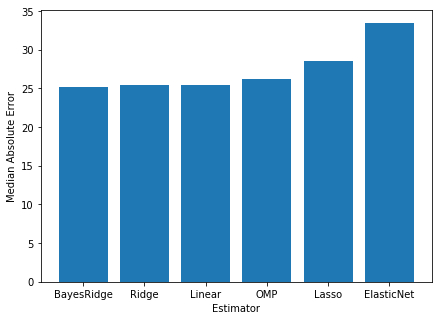

In [22]:
rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(aggregate.drop(['price'], axis=1),
                                                    aggregate.price, test_size=0.2, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')

In [23]:
n_est = 300


tuned_parameters = {
    "n_estimators": [ n_est ],
    "max_depth" : [ 4 ],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 1.00 ],
    "loss" : [ 'ls', 'lad' ]
}

gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='median_absolute_error')
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_
best

/Users/prateeksharma/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/prateeksharma/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/prateeksharma/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/prateeksharma/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='lad', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=1.0,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [24]:
abs(clf.best_score_)


24.268089468700673

Text(0,0.5,'Least Absolute Deviation')

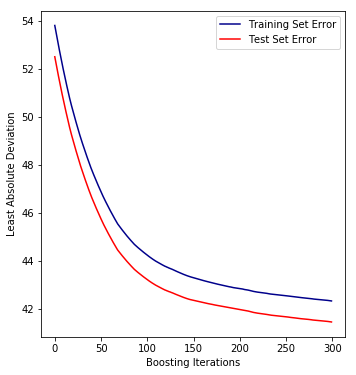

In [25]:
test_score = np.zeros(n_est, dtype=np.float64)

train_score = best.train_score_
for i, y_pred in enumerate(best.staged_predict(X_test)):
    test_score[i] = best.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(n_est), train_score, 'darkblue', label='Training Set Error')
plt.plot(np.arange(n_est), test_score, 'red', label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Least Absolute Deviation')